Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.  
Perform following tasks:  
1. Pre-process the dataset.  
2. Identify outliers.  
3. Check the correlation.  
4. Implement linear regression and random forest regression models.  
5. Evaluate the models and compare their respective scores like R2, RMSE, etc

In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
#We do not want to see warnings
warnings.filterwarnings("ignore") 

In [20]:
#import data
df = pd.read_csv("uber.csv")

In [21]:
df.head

<bound method NDFrame.head of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC      

In [22]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [23]:
#pickup_datetime is not in required data format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [24]:
#To segregate each time of date and time
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

# drop the column 'pickup_datetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)
df = df.drop('key', axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
 7   hour               200000 non-null  int32  
 8   day                200000 non-null  int32  
 9   month              200000 non-null  int32  
 10  year               200000 non-null  int32  
 11  dayofweek          200000 non-null  int32  
dtypes: float64(5), int32(5), int64(2)
memory usage: 14.5 MB


In [26]:
#Statistics of data
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [27]:
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

In [28]:
#Drop the rows with missing values
df.dropna(inplace=True)

In [29]:
#Check the missing values now
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

Unnamed: 0              Axes(0.125,0.786098;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_longitude        Axes(0.125,0.673415;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.560732;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.560732;0.352273x0.0939024)
passenger_count         Axes(0.125,0.448049;0.352273x0.0939024)
hour                 Axes(0.547727,0.448049;0.352273x0.0939024)
day                     Axes(0.125,0.335366;0.352273x0.0939024)
month                Axes(0.547727,0.335366;0.352273x0.0939024)
year                    Axes(0.125,0.222683;0.352273x0.0939024)
dayofweek            Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

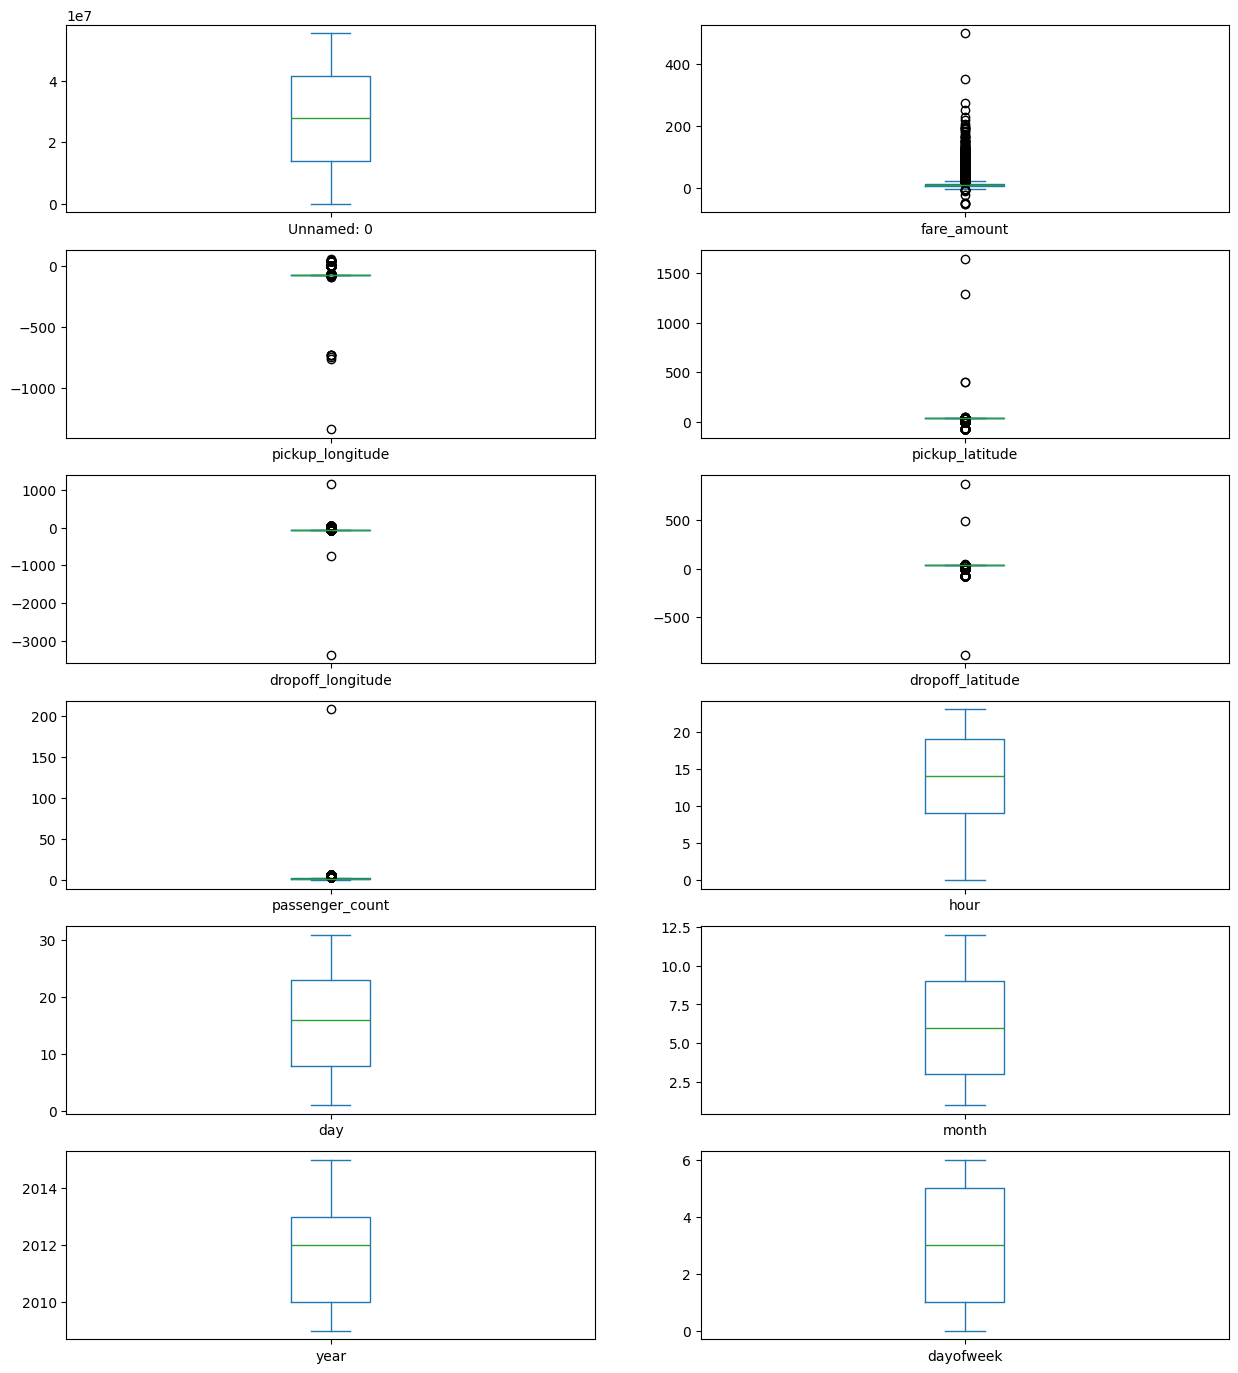

In [30]:
df.plot(kind='box', subplots=True, layout=(7, 2), figsize=(15, 20))

In [31]:
#Remove Outliers
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

df = treat_outliers_all(df , df.iloc[: , 0::])

Unnamed: 0              Axes(0.125,0.786098;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_longitude        Axes(0.125,0.673415;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.560732;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.560732;0.352273x0.0939024)
passenger_count         Axes(0.125,0.448049;0.352273x0.0939024)
hour                 Axes(0.547727,0.448049;0.352273x0.0939024)
day                     Axes(0.125,0.335366;0.352273x0.0939024)
month                Axes(0.547727,0.335366;0.352273x0.0939024)
year                    Axes(0.125,0.222683;0.352273x0.0939024)
dayofweek            Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

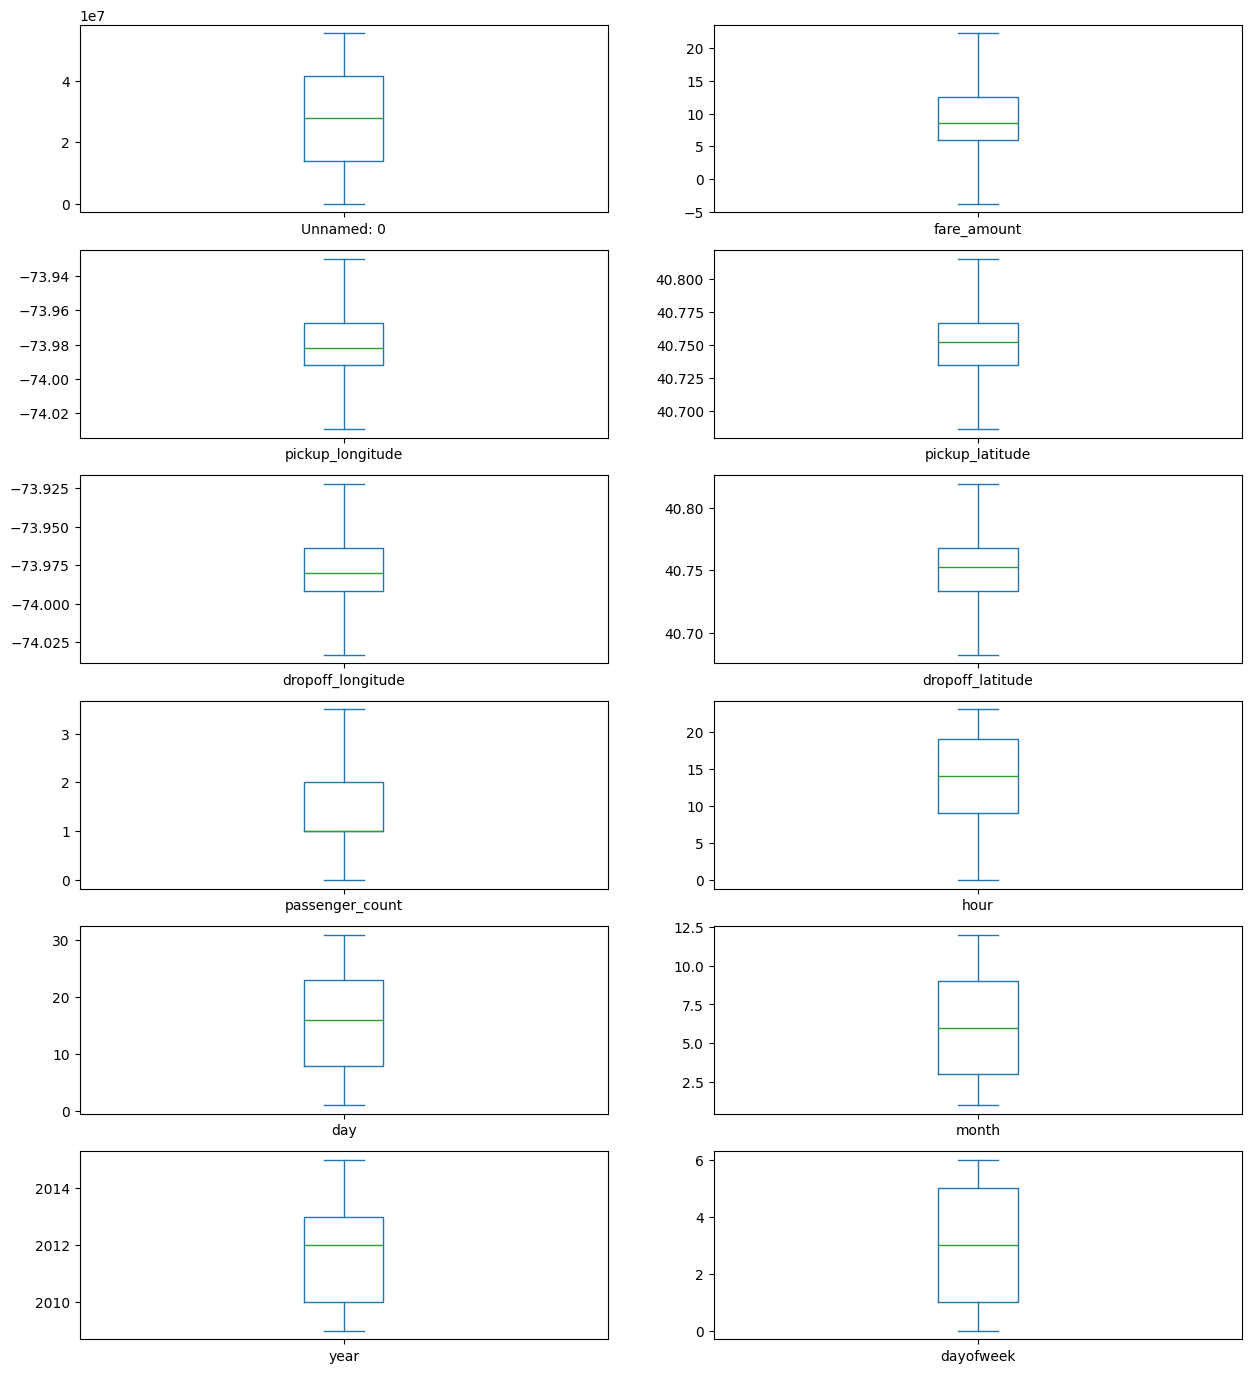

In [32]:
df.plot(kind='box', subplots=True, layout=(7, 2), figsize=(15, 20))

In [33]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
Unnamed: 0,1.000000,0.000428,0.002568,0.002224,0.006048,0.001119,0.002080,0.000044,0.000556,0.001299,-0.001325,-0.004596
fare_amount,0.000428,1.000000,0.154053,-0.110857,0.218681,-0.125874,0.015798,-0.023605,0.004552,0.030815,0.141271,0.013664
pickup_longitude,0.002568,0.154053,1.000000,0.259496,0.425622,0.073313,-0.013202,0.011590,-0.003194,0.001168,0.010193,-0.024645
pickup_latitude,0.002224,-0.110857,0.259496,1.000000,0.048887,0.515736,-0.012879,0.029691,-0.001544,0.001561,-0.014247,-0.042304
dropoff_longitude,0.006048,0.218681,0.425622,0.048887,1.000000,0.245670,-0.009304,-0.046560,-0.004008,0.002392,0.011347,-0.003337
dropoff_latitude,0.001119,-0.125874,0.073313,0.515736,0.245670,1.000000,-0.006329,0.019765,-0.003498,-0.001191,-0.009595,-0.031932
passenger_count,0.002080,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,0.020260,0.002699,0.010353,-0.009743,0.048542
hour,0.000044,-0.023605,0.011590,0.029691,-0.046560,0.019765,0.020260,1.000000,0.004664,-0.003924,0.002162,-0.086956
day,0.000556,0.004552,-0.003194,-0.001544,-0.004008,-0.003498,0.002699,0.004664,1.000000,-0.017358,-0.012165,0.005609
month,0.001299,0.030815,0.001168,0.001561,0.002392,-0.001191,0.010353,-0.003924,-0.017358,1.000000,-0.115860,-0.008785


In [34]:
#Time to apply learning models
from sklearn.model_selection import train_test_split
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

#Prediction
predict = lrmodel.predict(x_test)
#Check Error
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)

RMSE error for the model is  5.121057577080534


In [36]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)
#Fit the Forest
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)
#Errors for the forest
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)

RMSE value for Random Forest is: 2.4728571147092184
